In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
from scipy import ndimage
from skimage import io
from skimage import feature
from skimage import transform


In [2]:
def concatenate_images(a, b):
    w = a.shape[0]
    h = a.shape[1]
    return np.concatenate((a, b), axis=1)

def normalized(img):
    img = img - np.min(img)
    return img / np.max(img)

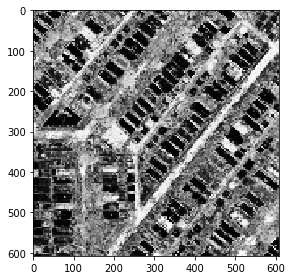

In [3]:
a = io.imread("predictions/prediction_48.png", flatten=True)
a = a[:, :]
np.shape(a)
io.imshow(a)

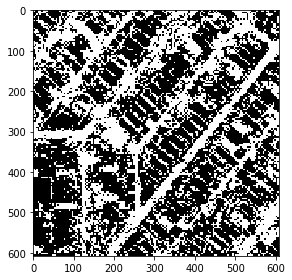

In [4]:
io.imshow(a > 0.5)

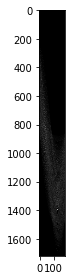

In [5]:
c = feature.canny(a, sigma = 5.0)
h = transform.hough_line(c)[0]
io.imshow(normalized(h))
coords = np.unravel_index(h.argmax(), h.shape)
angle = coords[1]

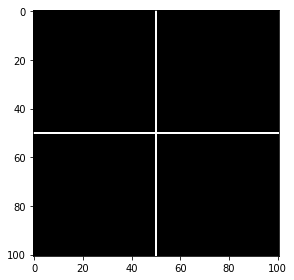

In [6]:
kernel = np.zeros((101, 101))
mid = int(kernel.shape[0] // 2.0)
kernel[mid, :] = kernel[:, mid] = 1
io.imshow(kernel)
kernel /= np.sum(kernel)

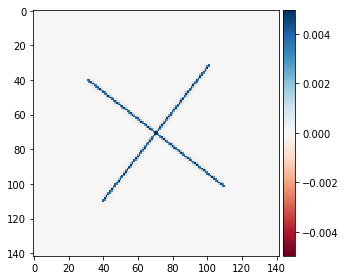

In [7]:
kernel = ndimage.rotate(kernel, -angle)
io.imshow(kernel)

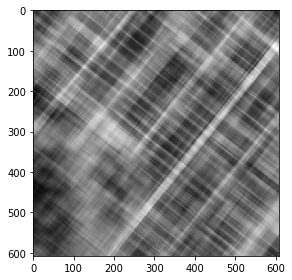

In [8]:
b = a
for _ in range(0, 1):
    b = ndimage.convolve(b, kernel)
b = normalized(b)
io.imshow(b)

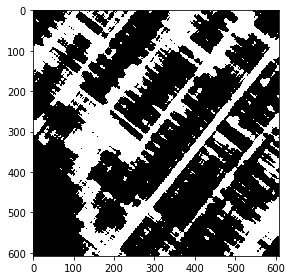

In [9]:
io.imshow(b > 0.5)